# 1. Standard Batch Gradient Descent

In [4]:
import torch
from torch.utils.tensorboard import SummaryWriter

from utils.general import get_logging_dir
from data import artificial_1D_linear as data
from experiments.artificial_1D_linear.documentation import (
    evaluate,
    plot_predictions,
)
from models import DenseNetwork

### Hyperparameters

In [5]:
BATCH_SIZE = 64
EPOCHS = 1000

INPUT_FEATURES = 1
OUTPUT_FEATURES = 1
ARCHITECTURE = [12, 12, 12, 12]

LOSS_FN = torch.nn.MSELoss()

train_dataloader = data.get_dataloader("train", BATCH_SIZE, shuffle=True)

### Model Definition

In [6]:
dense_network = DenseNetwork(
    DenseNetwork.Config(INPUT_FEATURES, ARCHITECTURE, OUTPUT_FEATURES)
)
model_name = "standard_bgd"
optimizer = torch.optim.Adam(dense_network.parameters(), lr=0.001)


writer = SummaryWriter(get_logging_dir(model_name, "artificial_1D_linear"))

### Model Training

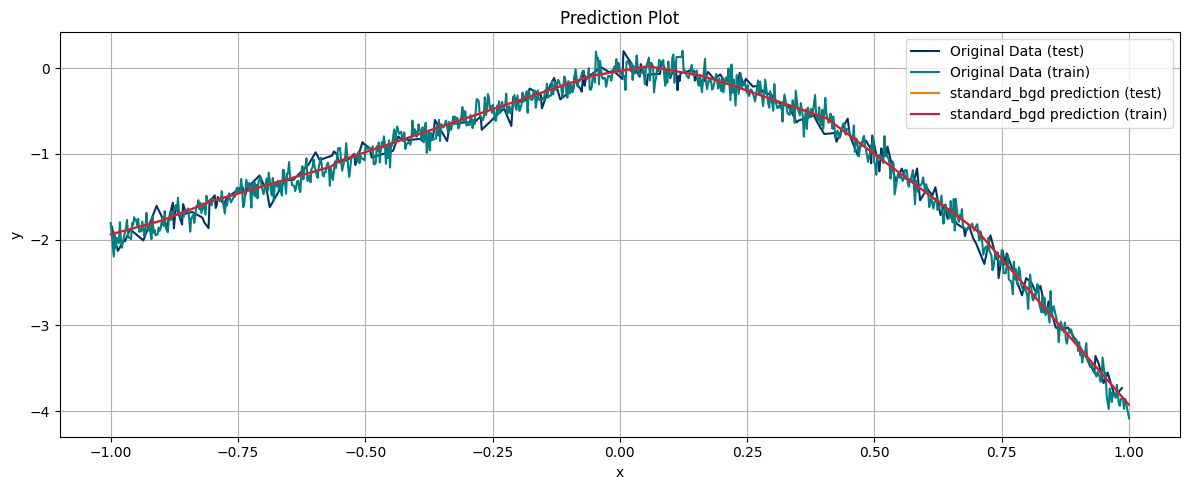

In [7]:
for e in range(EPOCHS):
    dense_network.train()
    losses = []
    for x, y in train_dataloader:
        optimizer.zero_grad()
        y_hat = dense_network(x)
        loss = LOSS_FN(y_hat, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    writer.add_scalar("loss", sum(losses) / len(losses), e)

    writer.add_scalar("test_loss", evaluate(dense_network), e)


plot_predictions(dense_network, model_name, writer)

writer.add_hparams(
    {"epochs": EPOCHS, "architecture": str(ARCHITECTURE)},
    {
        "MSE Test": evaluate(dense_network),
    },
    run_name=".",
)

writer.close()